# Gráfico de Transformação - Auto Featuring - Experimento

Este é um componente que utiliza uma técnica para explorar as possíveis soluções orientadas por um gráfico para executar a AutoFeaturing.

## Declaração de parâmetros e hiperparâmetros

Declare parâmetros com o botão  na barra de ferramentas.<br>
A variável `dataset` possui o caminho para leitura do arquivos importados na tarefa de "Upload de dados".<br>
Você também pode importar arquivos com o botão  na barra de ferramentas.

In [40]:
# parâmetros
dataset = "/tmp/data/iris.csv" #@param {type:"string"}
target = "Species" #@param {type:"feature", label:"Atributo alvo", description:"Esse valor será utilizado para garantir que o alvo não seja removido."}
date = None #@param {type:"feature", label:"Coluna de data", description:"Coluna com data que será utilizada para extrair novas características."}
group = ["SepalLengthCm"] #@param {type:"feature", multiple:true, label:"Colunas para agrupar", description:"Colunas que serão utilizadas para agrupar e extrair novas características."}

budget = 20 #@param {type:"integer", label:"Limite de busca", description:"Parâmetro para aumentar ou diminuir a busca por soluções de acordo com as restrições de recursos computacionais."}

## Acesso ao conjunto de dados

O conjunto de dados utilizado nesta etapa será o mesmo carregado através da plataforma.<br>
O tipo da variável retornada depende do arquivo de origem:
- [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) para CSV e compressed CSV: .csv .csv.zip .csv.gz .csv.bz2 .csv.xz
- [Binary IO stream](https://docs.python.org/3/library/io.html#binary-i-o) para outros tipos de arquivo: .jpg .wav .zip .h5 .parquet etc

In [41]:
import pandas as pd

df = pd.read_csv(dataset)

## Acesso aos metadados do conjunto de dados

Utiliza a função `stat_dataset` do [SDK da PlatIAgro](https://platiagro.github.io/sdk/) para carregar metadados. <br>
Por exemplo, arquivos CSV possuem `metadata['featuretypes']` para cada coluna no conjunto de dados (ex: categorical, numerical, or datetime).

In [43]:
import numpy as np
from platiagro import stat_dataset

metadata = stat_dataset(name=dataset)
featuretypes = metadata["featuretypes"]
columns = df.columns
df_features = pd.DataFrame(featuretypes)

## Chamada do Auto Featuring

In [44]:
from tgraph import TGraph

tgraph = TGraph(df, df_features, target, group, date, budget)

# Pre-process
tgraph.preprocess()

# Autofeat
df, features, transformations = tgraph.auto_feat()

## Cria visualização do resultado

Cria visualização do resultado como uma planilha.

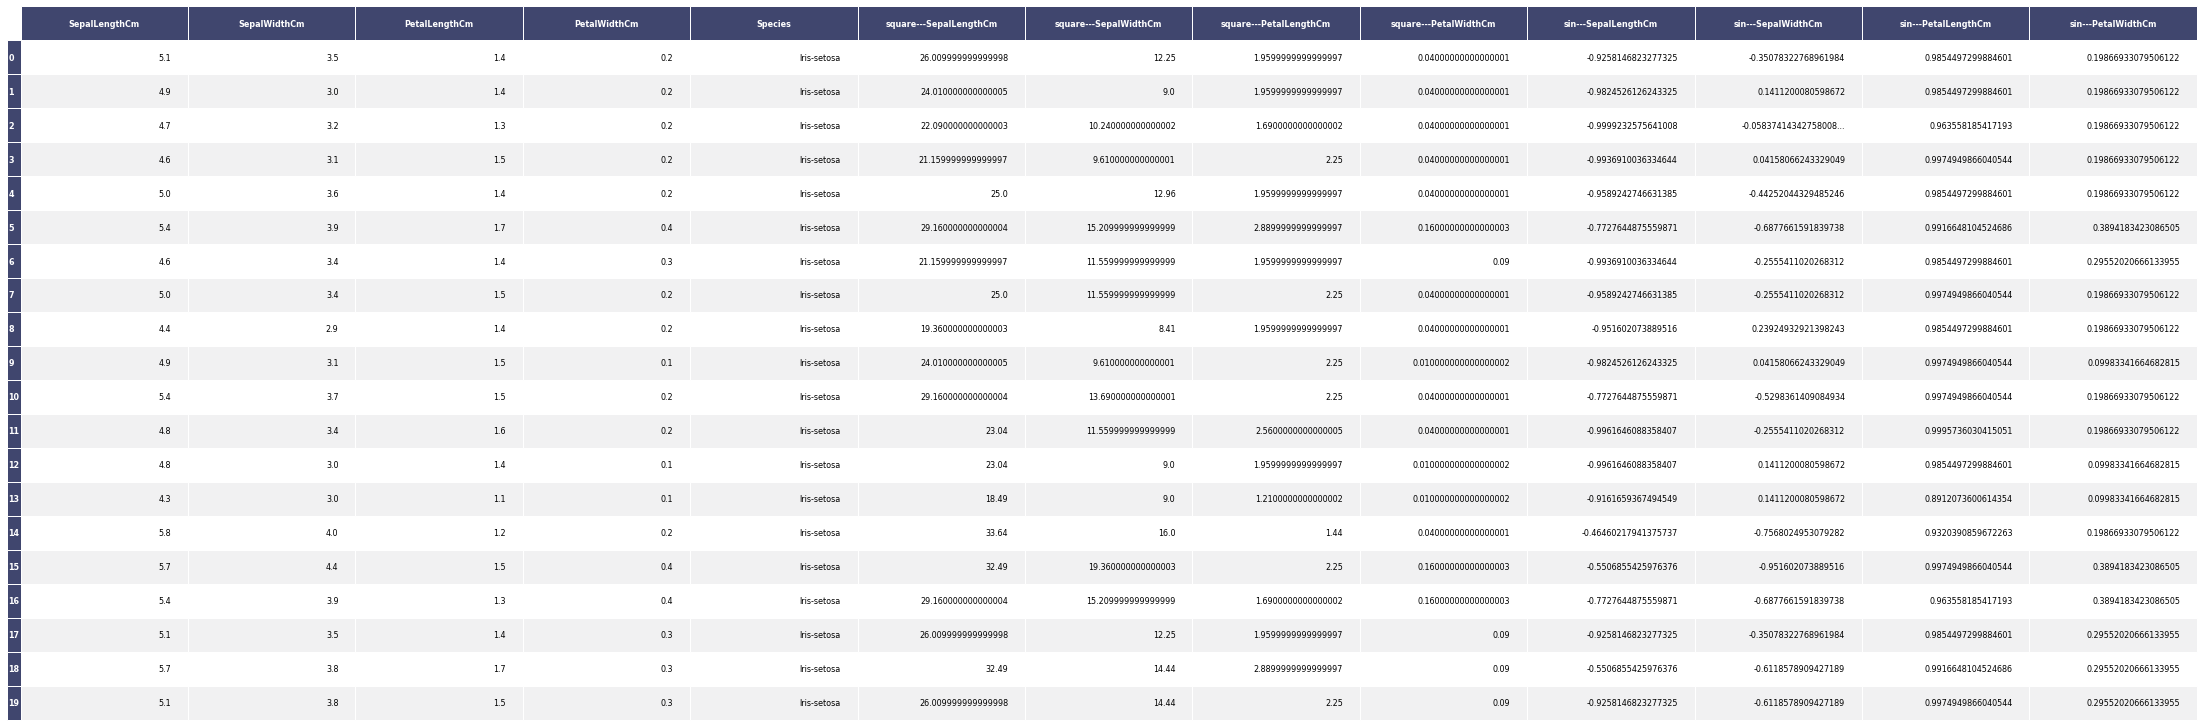

In [45]:
import matplotlib.pyplot as plt
from platiagro.plotting import plot_data_table

ax = plot_data_table(df)

plt.show()

## Salva alterações no conjunto de dados

O conjunto de dados será salvo (e sobrescrito com as respectivas mudanças) localmente, no container da experimentação, utilizando a função `pandas.DataFrame.to_csv`.<br>

In [46]:
# save dataset changes
df.to_csv(dataset, index=False)

## Salva resultados da tarefa 

A plataforma guarda o conteúdo de `/tmp/data/` para as tarefas subsequentes.

In [47]:
from joblib import dump

columns_deploy = list(columns)
columns_deploy.remove(target)

artifacts = {
    "features": features,
    "transformations": transformations,
    "columns": columns_deploy,
}

dump(artifacts, "/tmp/data/transformation-graph.joblib")

['/tmp/data/transformation-graph.joblib']